# Heatmap cooperation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools as it
import glob
from pathlib import Path
sns.set()
sns.set_palette('colorblind')

In [2]:
def read_csvx(path, *args, **kwargs):
    try:
        return pd.read_csv(str(path), *args, **kwargs)
    except Exception as e:
        print(e)
        return pd.read_csv(path, *args, **kwargs)

In [35]:
conds1 = ['small', 'big', 'huge']
conds2 = [100, 500, 1000, 5000]
gen = 15999

In [36]:
out = []
for cond1, cond2 in it.product(conds1, conds2):
    mainpath = Path(f'/data/logs/med-sig-decay-{cond2}-2018-07-26-1216/{cond1}_env_decay_{cond2}/')
    for run in range(1, 6):
        print(f'loading {mainpath / f"run_{run}/"}')
        logfile = mainpath / f'run_{run}/rep*/logall_{gen}.txt*'
        logs = [pd.read_csv(fname, delimiter="\t") for fname in glob.glob(str(logfile))]
        try:
            log = pd.concat(logs)
        except:
            print("nothing to load.")
            continue
        log = log.query('fake == 0') # Fakes are removed from data
        on_opp = log.query('onOpp == 1 and nbOnOpp == 2')
        mean_inv = on_opp['curCoop'].mean()
        out.append({'size': cond1, 'time': cond2, 'run': run, 'meanInv': mean_inv})
        

loading /data/logs/med-sig-decay-100-2018-07-26-1216/small_env_decay_100/run_1
loading /data/logs/med-sig-decay-100-2018-07-26-1216/small_env_decay_100/run_2
loading /data/logs/med-sig-decay-100-2018-07-26-1216/small_env_decay_100/run_3
loading /data/logs/med-sig-decay-100-2018-07-26-1216/small_env_decay_100/run_4
loading /data/logs/med-sig-decay-100-2018-07-26-1216/small_env_decay_100/run_5
loading /data/logs/med-sig-decay-500-2018-07-26-1216/small_env_decay_500/run_1
loading /data/logs/med-sig-decay-500-2018-07-26-1216/small_env_decay_500/run_2
loading /data/logs/med-sig-decay-500-2018-07-26-1216/small_env_decay_500/run_3
loading /data/logs/med-sig-decay-500-2018-07-26-1216/small_env_decay_500/run_4
loading /data/logs/med-sig-decay-500-2018-07-26-1216/small_env_decay_500/run_5
loading /data/logs/med-sig-decay-1000-2018-07-26-1216/small_env_decay_1000/run_1
loading /data/logs/med-sig-decay-1000-2018-07-26-1216/small_env_decay_1000/run_2
loading /data/logs/med-sig-decay-1000-2018-07-26

In [37]:
outdf = pd.DataFrame(out)
outdf['size'] = pd.Categorical(outdf['size'], categories=['small', 'big', 'huge'], ordered=True)
outdf

,meanInv,run,size,time
0,1.621456,1,small,100
1,2.786514,2,small,100
2,3.267851,3,small,100
3,3.037922,4,small,100
4,2.865918,5,small,100
5,3.028737,1,small,500
6,1.244753,2,small,500
7,4.148836,3,small,500
8,2.088582,4,small,500
9,2.580098,5,small,500


In [45]:
m = outdf.query('meanInv > 3').groupby(['size', 'time'], as_index=False).count()

In [46]:
m

,size,time,meanInv,run
0,small,100,2.0,2.0
1,small,500,2.0,2.0
2,small,1000,4.0,4.0
3,small,5000,2.0,2.0
4,big,100,1.0,1.0
5,big,500,3.0,3.0
6,big,1000,3.0,3.0
7,big,5000,3.0,3.0
8,huge,100,1.0,1.0
9,huge,500,3.0,3.0


In [47]:
f = m.pivot('size', 'time', 'meanInv').fillna(0)

Text(0.5,1,'Nombre de simulations où la moyenne des coopérations joués dépassent 3 à la génération 19000 sur 5.')

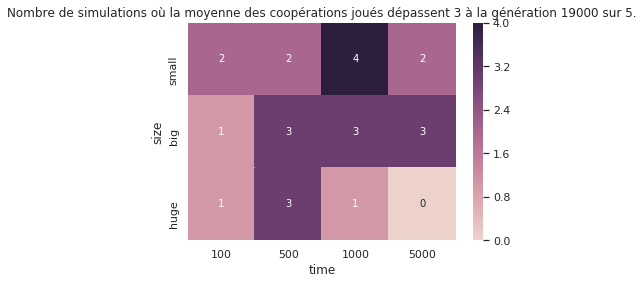

In [50]:
sns.heatmap(f, cmap=sns.cubehelix_palette(100), annot=True)
plt.title('Nombre de simulations où la moyenne des coopérations joués dépassent 3 à la génération 19000 sur 5.')

/home/pecoffet/miniconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


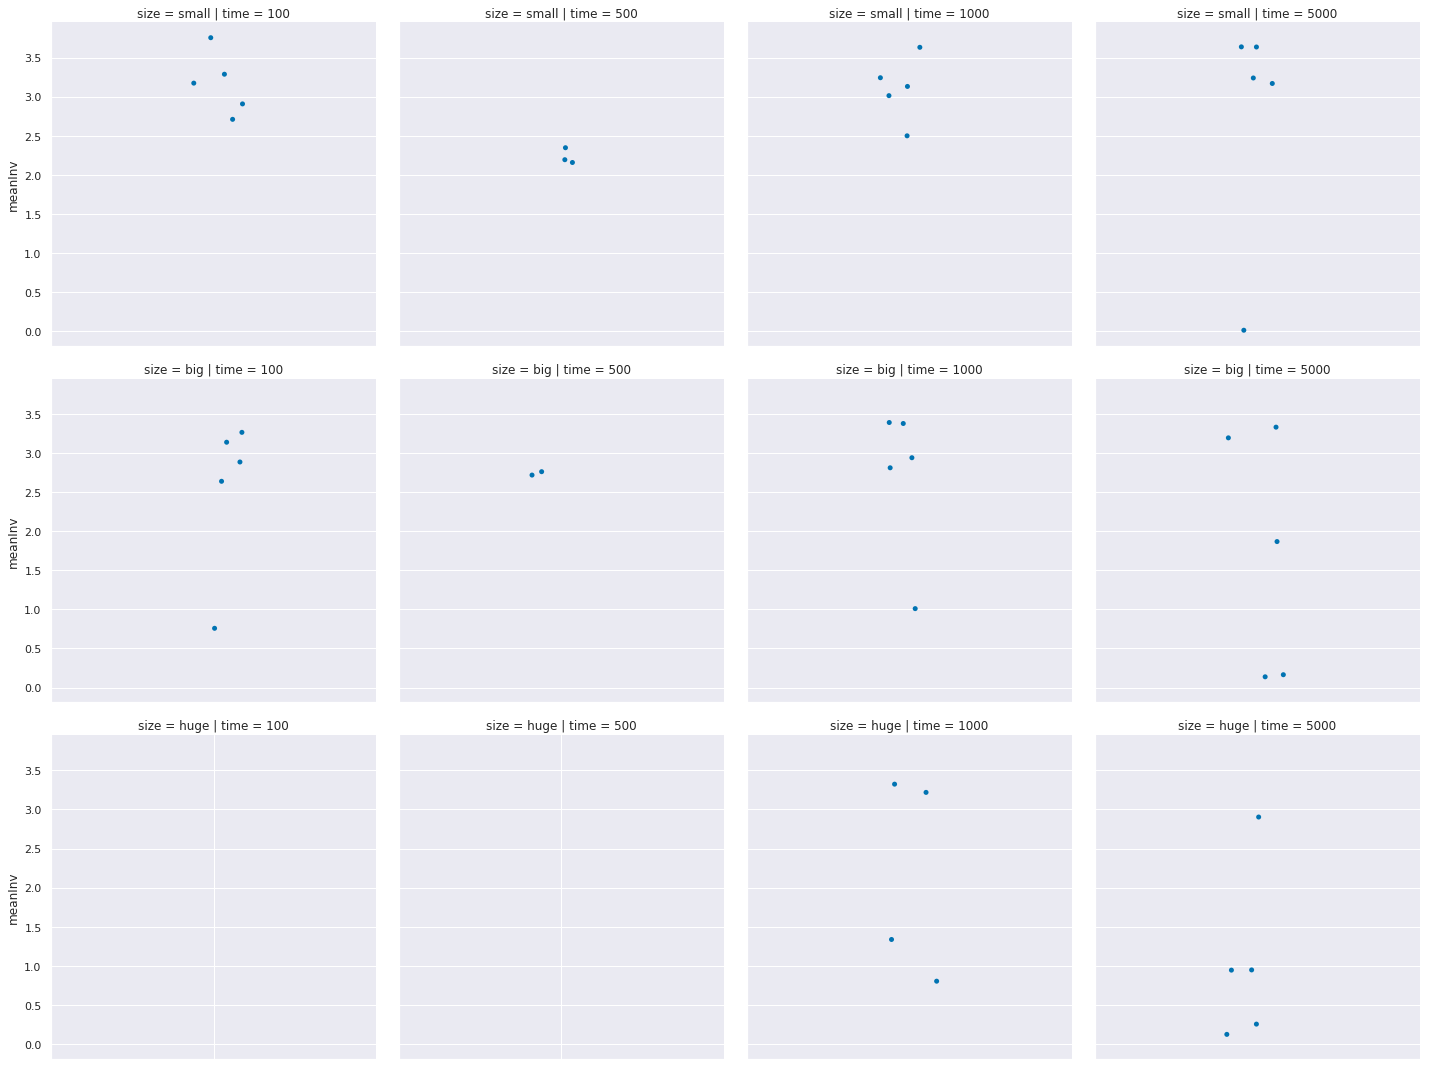

In [30]:
sns.factorplot(data=outdf, col='time', row='size', y='meanInv', kind='strip', sharey=True)